In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chebotinaa/fast-food-marketing-campaign-ab-test")

print("Path to dataset files:", path)

100%|██████████| 3.31k/3.31k [00:00<00:00, 2.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/versions/1


In [6]:
import os

# List all files in the dataset directory
dataset_files = os.listdir(path)
print("Files in the dataset:", dataset_files)

Files in the dataset: ['WA_Marketing-Campaign.csv']


In [7]:
import pandas as pd

# Replace 'data.csv' with the actual dataset file name
file_name = "WA_Marketing-Campaign.csv"  # Update based on the file found in the previous step
file_path = os.path.join(path, file_name)

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   

   SalesInThousands  
0             33.73  
1             35.67  
2             29.03  
3             39.25  
4             27.81  


In [8]:
print(df.shape)
print("-------------")
print(df.dtypes)
print("-------------")
print(df.isnull().sum())
print("-------------")
print(df.describe([0, 0.05, 0.25, 0.50, 0.95, 1]).T)

(548, 7)
-------------
MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object
-------------
MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64
-------------
                  count        mean         std    min     0%       5%  \
MarketID          548.0    5.715328    2.877001   1.00   1.00   1.0000   
LocationID        548.0  479.656934  287.973679   1.00   1.00   7.3500   
AgeOfStore        548.0    8.503650    6.638345   1.00   1.00   1.0000   
Promotion         548.0    2.029197    0.810729   1.00   1.00   1.0000   
week              548.0    2.500000    1.119055   1.00   1.00   1.0000   
SalesInThousands  548.0   53.466204   16.755216  17.34  17.34  30.6215   

                      25%    50%      95%    100%    

In [9]:
numerical = df.drop(['MarketSize','MarketID','LocationID', 'Promotion', 'week'],axis =1)
categorical = ['MarketSize','MarketID','LocationID', 'Promotion', 'week']

for i in categorical:
  print(f"Column '{i}'")
  unique_elements = df[i].unique()
  for j in unique_elements:
    print(f"Value: '{j}' has {df[df[i] == j][i].count()} instances")
  print()

Column 'MarketSize'
Value: 'Medium' has 320 instances
Value: 'Small' has 60 instances
Value: 'Large' has 168 instances

Column 'MarketID'
Value: '1' has 52 instances
Value: '2' has 24 instances
Value: '3' has 88 instances
Value: '4' has 36 instances
Value: '5' has 60 instances
Value: '6' has 60 instances
Value: '7' has 60 instances
Value: '8' has 48 instances
Value: '9' has 40 instances
Value: '10' has 80 instances

Column 'LocationID'
Value: '1' has 4 instances
Value: '2' has 4 instances
Value: '3' has 4 instances
Value: '4' has 4 instances
Value: '5' has 4 instances
Value: '6' has 4 instances
Value: '7' has 4 instances
Value: '8' has 4 instances
Value: '9' has 4 instances
Value: '10' has 4 instances
Value: '11' has 4 instances
Value: '12' has 4 instances
Value: '13' has 4 instances
Value: '101' has 4 instances
Value: '102' has 4 instances
Value: '103' has 4 instances
Value: '104' has 4 instances
Value: '105' has 4 instances
Value: '106' has 4 instances
Value: '201' has 4 instances
Va

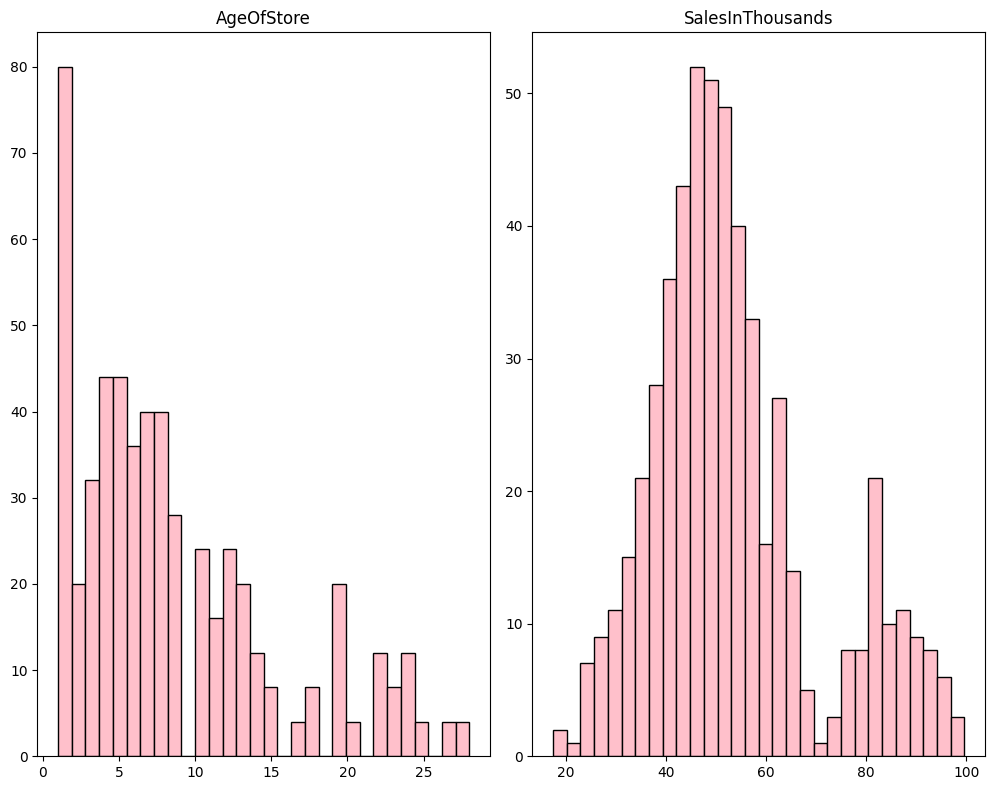

In [10]:
import matplotlib.pyplot as plt
import math

# Define numerical columns
numerical = ['AgeOfStore', 'SalesInThousands']

# Calculate the number of rows and columns for subplots
num_cols = 3  # Set a fixed number of columns
num_rows = math.ceil(len(numerical) / num_cols)  # Dynamically calculate the rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the numerical columns and plot histograms
for i, column_name in enumerate(numerical):  # Directly iterate over column names
    column_data = df[column_name]
    axes[i].hist(column_data, bins=30, color='pink', alpha = 1, edgecolor='black')
    axes[i].set_title(column_name)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Safely remove any unused axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


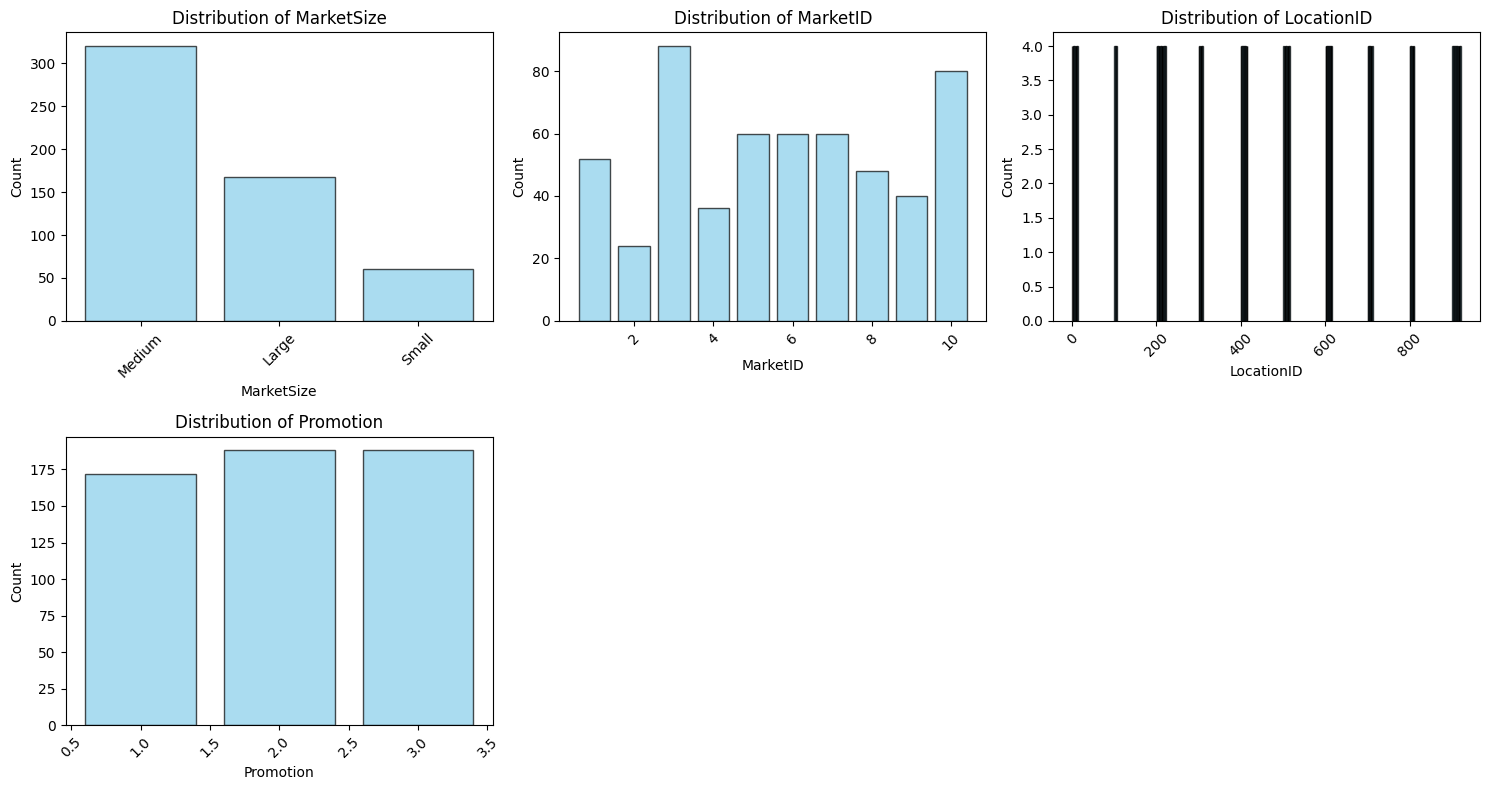

In [11]:
# Number of categorical columns
num_cols = 3  # Adjust based on the layout you want
num_rows = math.ceil(len(categorical) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot each categorical column
for i, categorical in enumerate(categorical):
    column_data = df[categorical]
    value_counts = column_data.value_counts()

    # Bar plot
    axes[i].bar(value_counts.index, value_counts.values, alpha=0.7, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Distribution of {categorical}')
    axes[i].set_xlabel(categorical)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove unused subplots
for j in range(len(categorical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

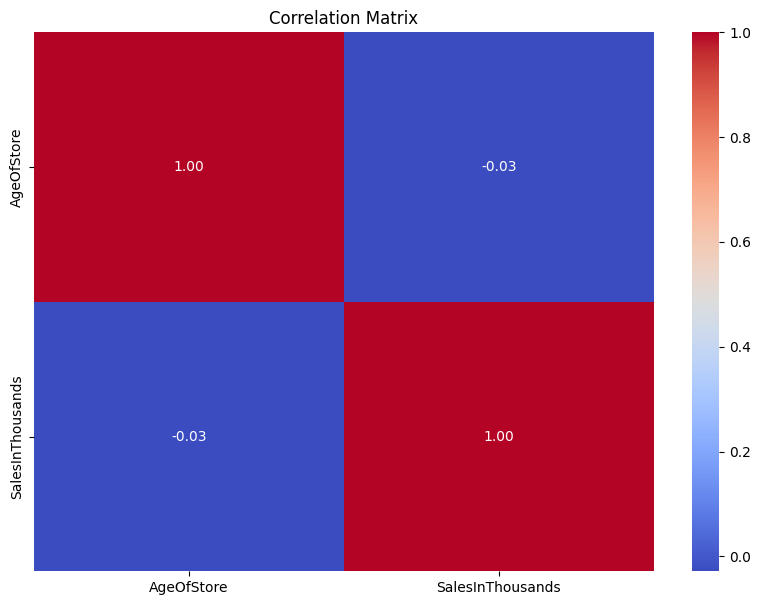

In [12]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df[numerical].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

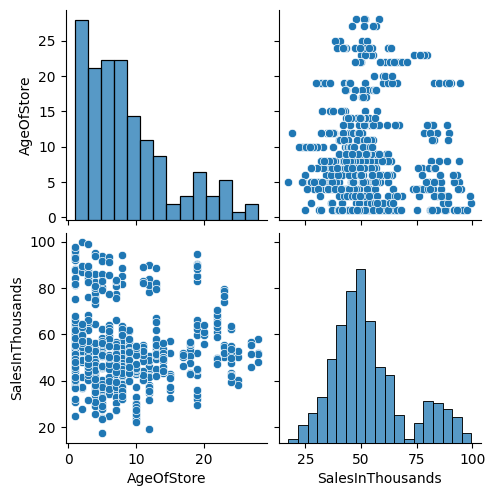

In [13]:
# Create a pair plot
sns.pairplot(data=df[numerical])
plt.show()

<ipython-input-14-bdcda4b3f175>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '3' '2' '2' '3' '3' '3' '3' '3' '3' '3' '1' '1' '1' '1' '1' '1'
 '1' '2' '3' '1' '1' '3' '3' '3' '1' '1' '1' '1' '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  outliers.loc[:, 'Promotion'] = outliers['Promotion'].astype(str)


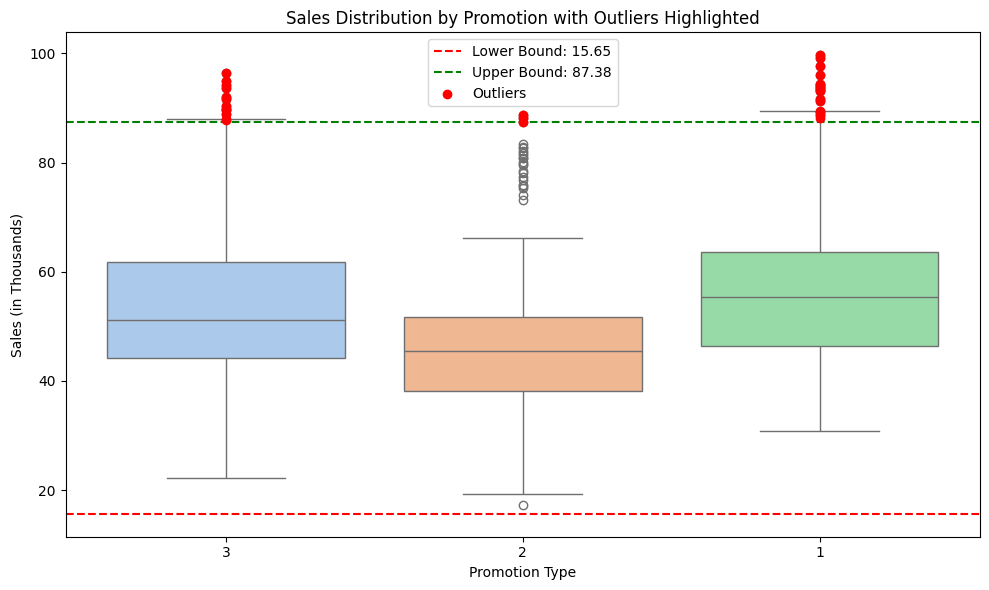

In [14]:
# Calculate IQR
Q1 = df['SalesInThousands'].quantile(0.25)
Q3 = df['SalesInThousands'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for the entire dataset
outliers = df[(df['SalesInThousands'] < lower_bound) | (df['SalesInThousands'] > upper_bound)]

# Convert 'Promotion' to categorical for alignment in plotting
df['Promotion'] = df['Promotion'].astype(str)
outliers.loc[:, 'Promotion'] = outliers['Promotion'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df, palette="pastel", hue = 'Promotion', dodge = False, legend = False)  # No default fliers

# Add lines for lower and upper bounds on the overall scale
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

# Overlay outliers
plt.scatter(outliers['Promotion'], outliers['SalesInThousands'], color='red', label='Outliers', zorder=2)
plt.title('Sales Distribution by Promotion with Outliers Highlighted')
plt.xlabel('Promotion Type')
plt.ylabel('Sales (in Thousands)')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
def remove_outliers(dataframe, col_name, promo_type):
    # Filter data for the specific promotion type
    df_p = dataframe[dataframe['Promotion'] == promo_type].astype(str)
    promo_type = str(promo_type)

    df_p = dataframe[dataframe['Promotion'] == promo_type]

    # Debugging: Check if filtered DataFrame is empty
    if df_p.empty:
        print(f"No data found for Promotion Type {promo_type}. Returning empty DataFrame.")
        return df_p

    # Calculate the first and third quartiles
    quartile1 = np.percentile(df_p[col_name], 25)
    quartile3 = np.percentile(df_p[col_name], 75)

    # Calculate the interquartile range (IQR)
    interquantile_range = quartile3 - quartile1

    # Determine the upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    # Return the dataframe without outliers
    return df_p[(df_p[col_name] >= low_limit) & (df_p[col_name] <= up_limit)]

cleaned_data_p1 = remove_outliers(df, 'SalesInThousands', 1)
cleaned_data_p2 = remove_outliers(df, 'SalesInThousands', 2)
cleaned_data_p3 = remove_outliers(df, 'SalesInThousands', 3)

print(cleaned_data_p1.shape)
print(cleaned_data_p2.shape)
print(cleaned_data_p3.shape)

(160, 7)
(164, 7)
(178, 7)


In [16]:
clean_df = pd.concat([cleaned_data_p1, cleaned_data_p2, cleaned_data_p3], ignore_index=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,3,12,1,1,44.54
1,1,Medium,3,12,1,2,37.94
2,1,Medium,3,12,1,3,45.49
3,1,Medium,3,12,1,4,34.75
4,1,Medium,7,15,1,1,42.92


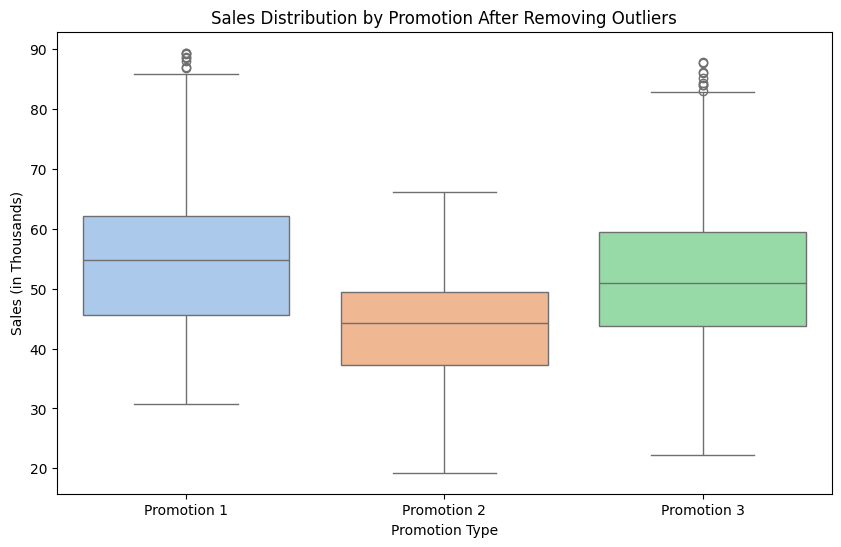

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=clean_df, palette = "pastel", hue = 'Promotion')
plt.title('Sales Distribution by Promotion After Removing Outliers')
plt.xlabel('Promotion Type')
plt.ylabel('Sales (in Thousands)')
plt.xticks(ticks=[0, 1, 2], labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])
plt.show()

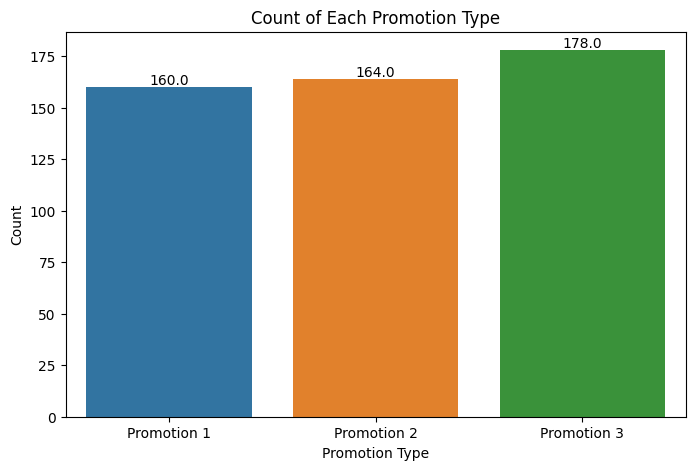

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Promotion', data=clean_df, hue = "Promotion")
plt.title('Count of Each Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Promotion 1', 'Promotion 2', 'Promotion 3'])

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


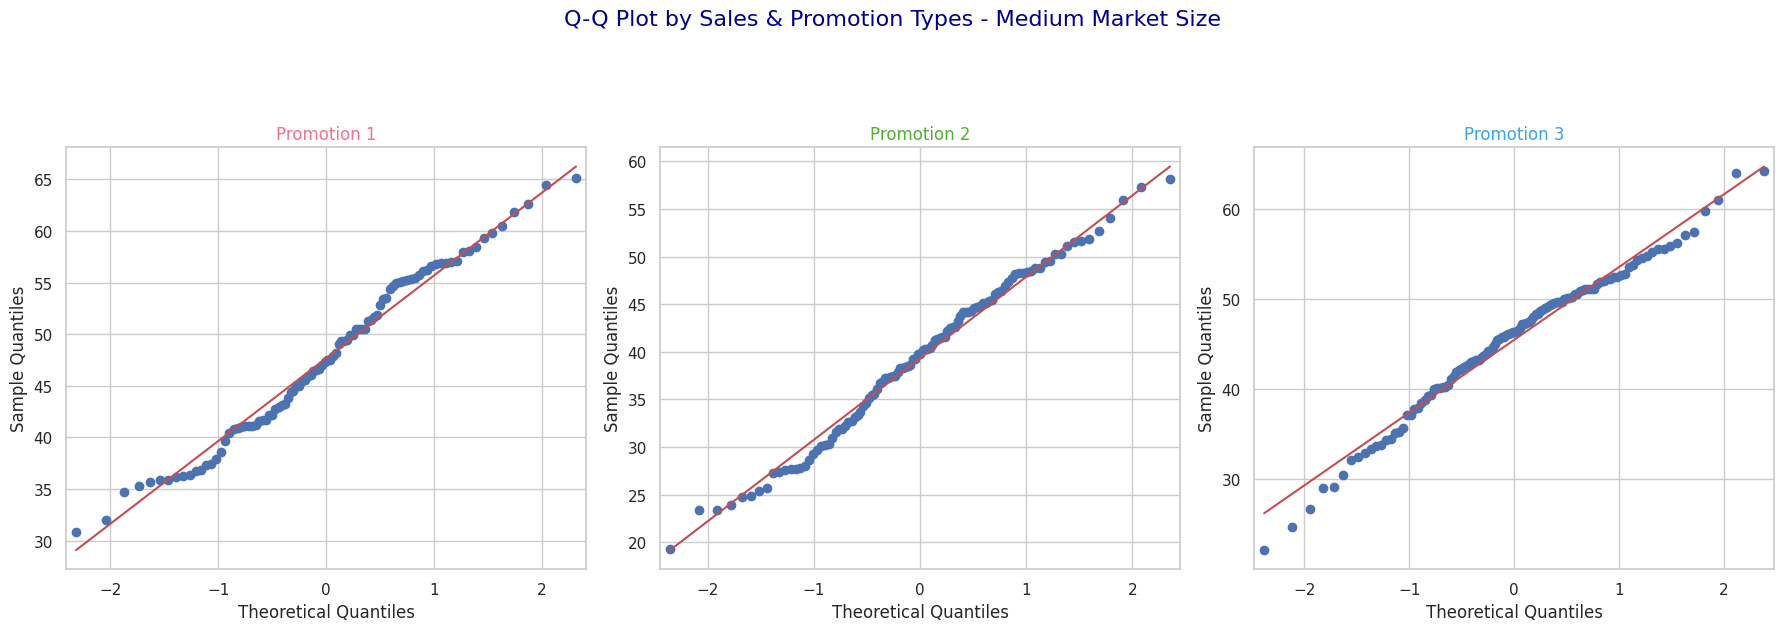

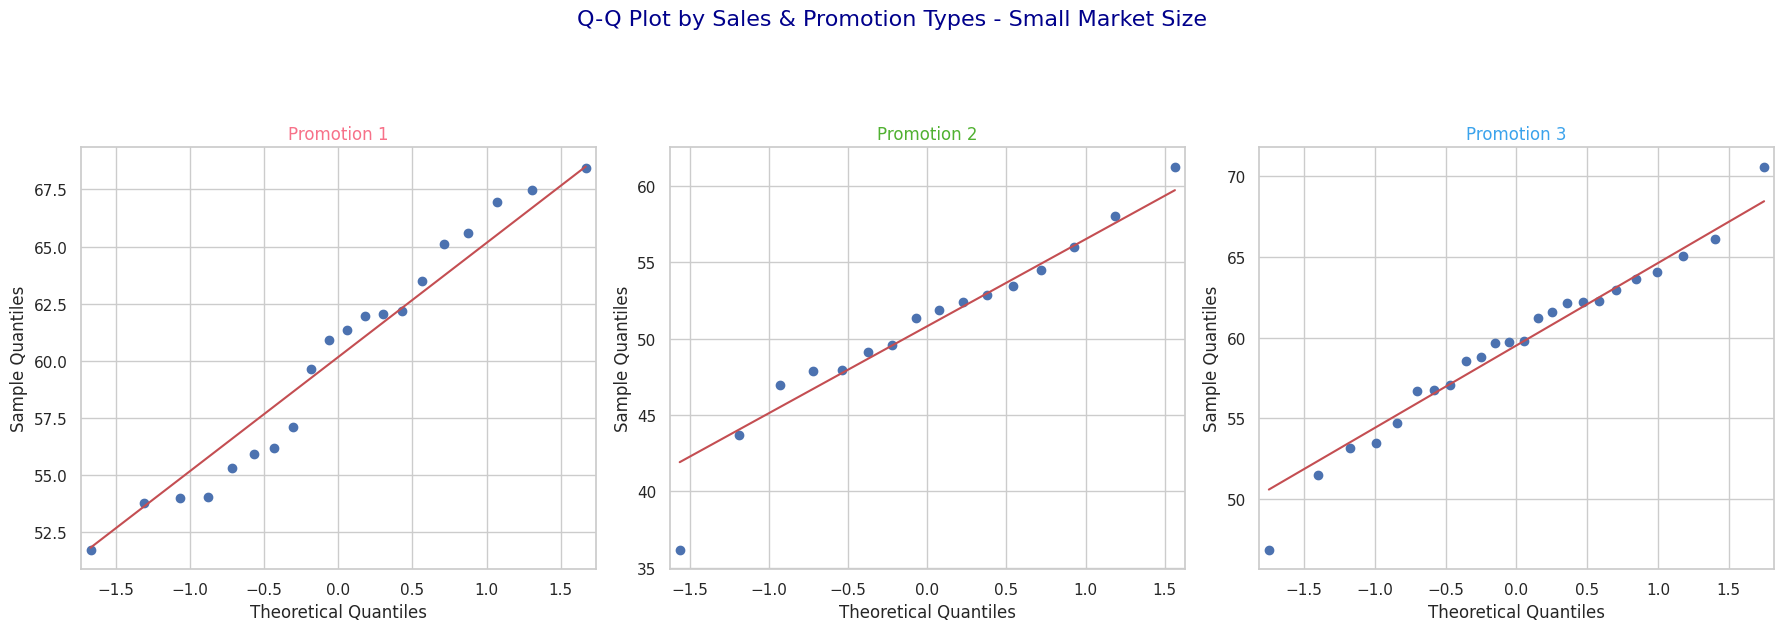

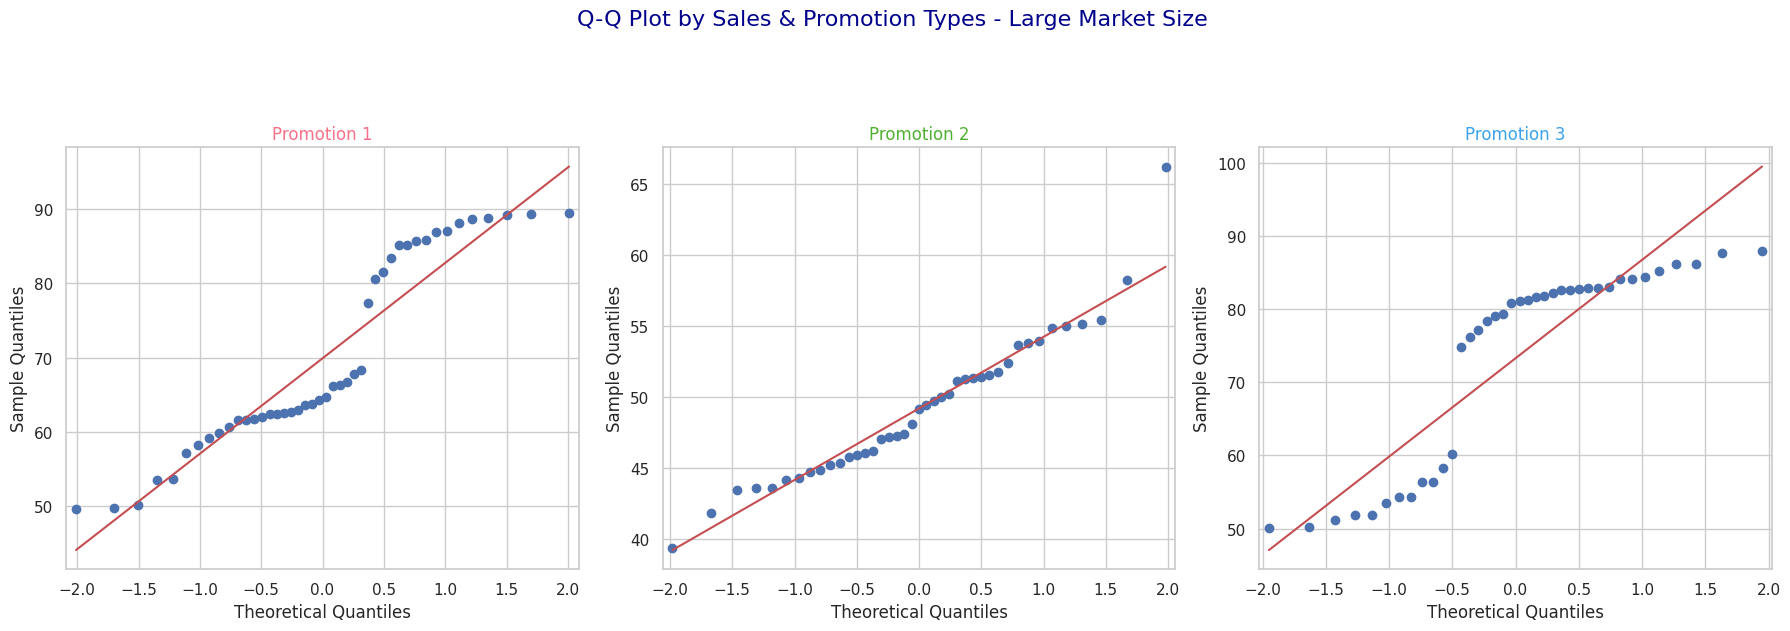

In [19]:
from statsmodels.graphics.gofplots import qqplot

clean_df["Promotion"] = clean_df["Promotion"].astype(int)  # Ensure it's numeric
clean_df["MarketSize"] = clean_df["MarketSize"].astype(str)  # If it's categorical

sns.set(style="whitegrid")
colors = sns.color_palette("husl", 3)

market_size = clean_df["MarketSize"].unique()

for market in market_size:

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Q-Q Plot by Sales & Promotion Types - {market} Market Size', x=0.5, y=1.05, fontsize=16, color="darkblue")

    for i, promo in enumerate([1, 2, 3]):
        subset = clean_df[(clean_df["Promotion"] == promo) & (clean_df["MarketSize"] == market)]

        if len(subset) == 0:  # Check if the subset is empty
            axs[i].text(0.5, 0.5, "No Data", fontsize=12, ha="center", color="red")
            axs[i].set_xticks([])
            axs[i].set_yticks([])
        else:
            qqplot(subset["SalesInThousands"], line="s", ax=axs[i], color=colors[i])

        axs[i].set_title(f"Promotion {promo}", fontsize=12, color=colors[i])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [20]:
clean_df.groupby("Promotion").agg({"SalesInThousands": ["count", "mean", "median", "std"]})


SalesInThousands                              
                     count       mean  median        std
Promotion                                               
1                      160  55.345187  54.825  13.594556
2                      164  42.906098  44.300   9.057592
3                      178  53.297978  50.975  14.694229

In [21]:
clean_df.groupby(["Promotion", "MarketSize"]).agg({"SalesInThousands": ["count", "mean", "median", "std"]})

SalesInThousands                              
                                count       mean  median        std
Promotion MarketSize                                               
1         Large                    44  69.895682  64.500  13.004280
          Medium                   96  47.672604  47.425   8.067331
          Small                    20  60.162500  61.145   5.127279
2         Large                    41  49.185854  49.160   5.098969
          Medium                  107  39.317850  39.800   8.589968
          Small                    16  50.810625  51.600   5.869816
3         Large                    38  73.271316  80.990  13.623107
          Medium                  116  45.468879  46.295   8.091366
          Small                    24  59.514167  59.745   5.212687

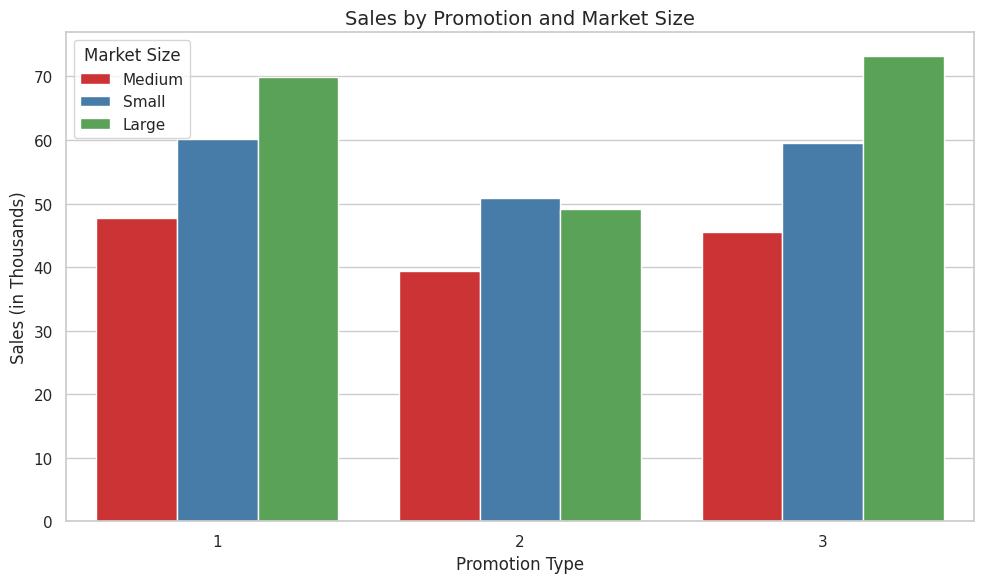

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=clean_df, x='Promotion', y='SalesInThousands', hue='MarketSize', errorbar=None, palette='Set1')
plt.title('Sales by Promotion and Market Size', fontsize=14)
plt.xlabel('Promotion Type', fontsize=12)
plt.ylabel('Sales (in Thousands)', fontsize=12)
plt.legend(title='Market Size', title_fontsize='12', fontsize='11')
plt.tight_layout()
plt.show()

In [23]:
# Splitting the data into A and B groups
group_A = clean_df[clean_df['Promotion'].isin([1])]
group_B = clean_df[clean_df['Promotion'].isin([2])]
group_C = clean_df[clean_df['Promotion'].isin([3])]

In [24]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H test comparing the conversion rates of the four age groups
h_stat, p_value_k = kruskal(group_A['SalesInThousands'], group_B['SalesInThousands'], group_C['SalesInThousands'])

# Print the H-statistic and p-value
print("H-statistic:", h_stat)
print("P-value:", p_value_k)

H-statistic: 80.06537463352375
P-value: 4.111732025490055e-18


In [25]:
# Set alpha
alpha = 0.05

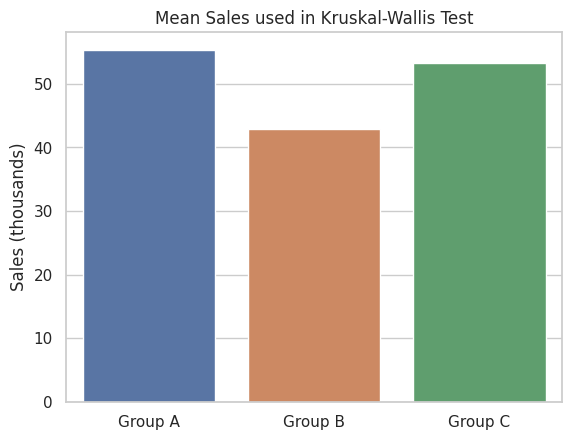


Kruskal Wallis H Test:
P-value: 4.111732025490055e-18
Reject the null hypothesis: There is a significant difference in Sales between the three promotion types.


In [26]:
# Create list to hold four group means
KW_y = []

# Append group means to list
KW_y.append(group_A['SalesInThousands'].mean())
KW_y.append(group_B['SalesInThousands'].mean())
KW_y.append(group_C['SalesInThousands'].mean())

#Visualize differences in group means
KW_x = ['Group A', 'Group B','Group C']
sns.barplot(x = KW_x, y = KW_y, hue = KW_x)
plt.title('Mean Sales used in Kruskal-Wallis Test')
plt.ylabel('Sales (thousands)')
plt.show()

# Interpret the results from the Kruskal_wallis H test
print("\nKruskal Wallis H Test:")
print("P-value:", p_value_k)
if p_value_k < alpha:
    print("Reject the null hypothesis: There is a significant difference in Sales between the three promotion types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference Sales between the three promotion types.")


In [27]:
# Calculate the total number of observations
N = len(clean_df)

# Set the number of groups
k = 3

# Calculate Eta-squared
eta_squared = (h_stat - k + 1) / (N - k)

# Print the Eta-squared value
print("Eta-squared:", eta_squared)

Eta-squared: 0.15644363654012775


## **Kruskal-Wallis Test Analysis**

Objective:

Assess whether there is a significant difference in sales performance between the three promotion types.

**Groups & Means:**

Group A (Promotion 1): Mean Sales = ~54K

Group B (Promotion 2): Mean Sales = ~43K

Group C (Promotion 3): Mean Sales = ~53K

**Statistical Test Results:**

H-statistic: (value from output)
P-value: 4.11e-18 (highly significant at α = 0.05)

At a p-value of 4.11e-18, the Kruskal-Wallis test confirms a statistically significant difference in sales between the three promotion types.

**Effect Size Analysis:**

Eta-squared: 0.156

This corresponds to a large effect size, meaning the promotion type has a substantial impact on sales performance.

Recommendations:
1.   **Prioritize Promotion Types with Higher**

Promotions 1 and 3 have significantly higher average sales compared to Promotion

Future marketing efforts should emphasize these two promotions to maximize revenue.


2.   **Investigate the Lower Sales in Promotion 2**

Analyze factors affecting its lower sales performance.

Possible areas of improvement: pricing strategy, target audience, promotional channels.


3.   **Tailor Promotion Strategies for Different**

Consider testing new A/B variations within each promotion type.

Further segment data based on market size, customer demographics, and regional differences to optimize future promotions.


# **The Dunn test**

After conducting the Kruskal-Wallis test, which indicates whether there is a statistically significant difference among the groups, we still don’t know which specific groups are different from each other.

**The Dunn test** is a post-hoc analysis that helps to identify which pairs of groups are significantly different. It’s necessary when the Kruskal-Wallis test returns a significant result, as it helps to pinpoint the exact groups with differences while adjusting for multiple comparisons to control for Type I error.

In [28]:
!pip install scikit-posthocs

import scikit_posthocs
from scikit_posthocs import posthoc_dunn

# Ensure 'Promotion' is categorical
clean_df["Promotion"] = clean_df["Promotion"].astype(str)

# Remove NaN values
clean_df = clean_df.dropna(subset=["SalesInThousands", "Promotion"])

# Perform Dunn's test
dunn_result = posthoc_dunn(clean_df, val_col="SalesInThousands", group_col="Promotion", p_adjust="bonferroni")

# Display result
dunn_result


,1,2,3
1,1.000000e+00,6.508986e-17,1.550190e-01
2,6.508986e-17,1.000000e+00,4.383361e-11
3,1.550190e-01,4.383361e-11,1.000000e+00


# **Dunn’s Test Results Analysis**

**Objective**

The Dunn’s post hoc test was conducted to determine which specific promotions (1, 2, and 3) show statistically significant differences in sales performance, following the Kruskal-Wallis test.

**Results Interpretation**

The p-values for pairwise comparisons indicate:

**Promotion 1 vs. Promotion 2:** p = 6.51e-17 → Significant difference in sales, suggesting that Promotion 1 performs better than Promotion 2.

**Promotion 1 vs. Promotion 3:** p = 0.155 → No statistically significant difference, meaning Promotions 1 and 3 perform similarly.

**Promotion 2 vs. Promotion 3:** p = 4.38e-11 → Significant difference, indicating that Promotion 2 underperforms compared to Promotion 3.

**Conclusion & Recommendations**

Promotion 2 has the lowest mean sales among all three promotions, confirming that it significantly underperforms.

Promotions 1 and 3 perform similarly, suggesting that they drive sales more effectively than Promotion 2.

**Recommendations:**

*   Investigate the structure of Promotion2— whether it lacks incentives, has poor targeting, or fails to engage customers effectively.
*   Reallocate budget from Promotion 2 to better-performing promotions (1 and 3) or optimize Promotion 2 by adjusting pricing, targeting, or campaign messaging.
*   Conduct further A/B testing to refine the promotional strategy and enhance sales impact.

## **# Analyzing Underperformance of Promotion 2**



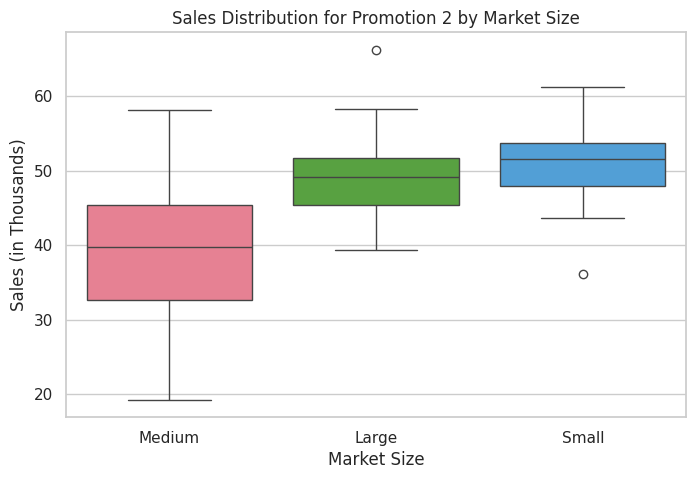

Kruskal-Wallis Test: H-statistic = 52.4285, P-value = 0.0000
Significant difference in Sales across Market Sizes for Promotion 2.


In [35]:
from scipy.stats import kruskal
# Filter data for Promotion 2 only
promo2_df = clean_df[clean_df["Promotion"] == '2'].dropna(subset=["SalesInThousands", "MarketSize"])

# Check sales distribution by Market Size
plt.figure(figsize=(8, 5))
sns.boxplot(x="MarketSize", y="SalesInThousands", data=promo2_df, palette="husl", hue = "MarketSize")
plt.title("Sales Distribution for Promotion 2 by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Sales (in Thousands)")
plt.show()

# Run Kruskal-Wallis test to check statistical differences across Market Sizes
small_sales = promo2_df[promo2_df["MarketSize"] == "Small"]["SalesInThousands"]
medium_sales = promo2_df[promo2_df["MarketSize"] == "Medium"]["SalesInThousands"]
large_sales = promo2_df[promo2_df["MarketSize"] == "Large"]["SalesInThousands"]

h_stat, p_value = kruskal(small_sales, medium_sales, large_sales)

# Display results
print(f"Kruskal-Wallis Test: H-statistic = {h_stat:.4f}, P-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference in Sales across Market Sizes for Promotion 2.")
else:
    print("No significant difference in Sales across Market Sizes for Promotion 2.")


# Interpretation & Insights

Market Size Affects Sales Performance:

*   Small markets show the highest median sales (~52K).
*   Medium markets have noticeably lower sales (~40K).
*   Large markets have similar performance (~48K).

This suggests that Promotion 2 underperforms in medium-sized markets compared to small and large markets.


**Potential Strategic Adjustments:**

Optimize Promotion 2 in Medium-Sized Markets: Since sales are significantly lower, investigate why Promotion 2 is not resonating well in these markets.

Enhance Targeting for Small and Large Markets: Since these markets respond better to Promotion 2, consider focusing marketing efforts or optimizing inventory for these locations.

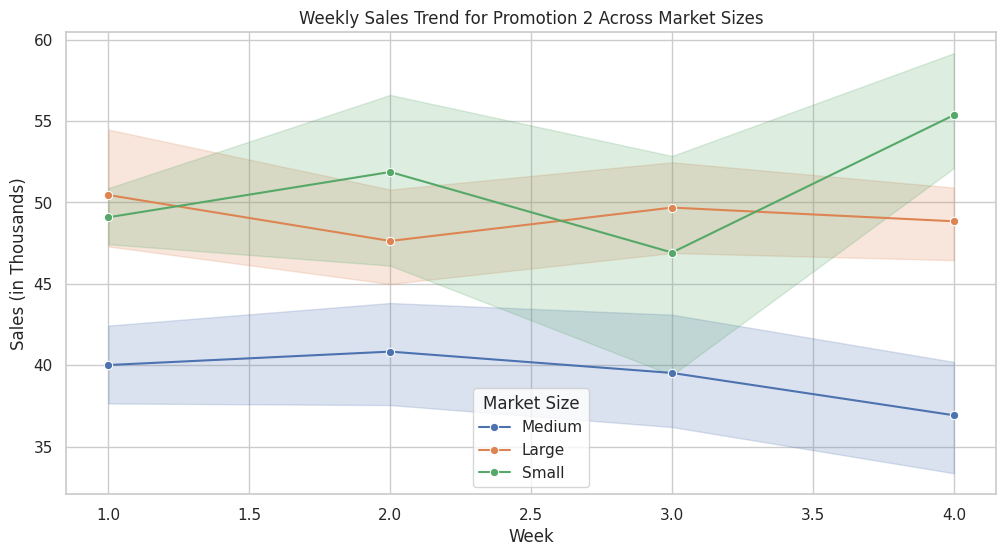

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=clean_df[clean_df["Promotion"] == '2'], x="week", y="SalesInThousands", hue="MarketSize", marker="o")
plt.title("Weekly Sales Trend for Promotion 2 Across Market Sizes")
plt.xlabel("Week")
plt.ylabel("Sales (in Thousands)")
plt.legend(title="Market Size")
plt.show()

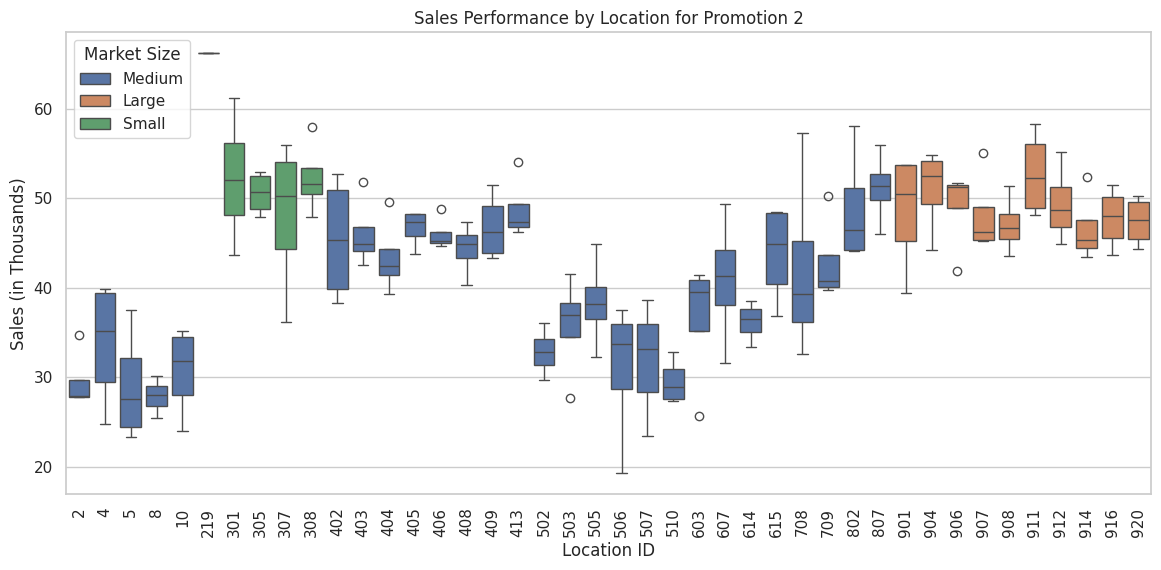

In [39]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=clean_df[clean_df["Promotion"] == '2'], x="LocationID", y="SalesInThousands", hue="MarketSize")
plt.xticks(rotation=90)
plt.title("Sales Performance by Location for Promotion 2")
plt.xlabel("Location ID")
plt.ylabel("Sales (in Thousands)")
plt.legend(title="Market Size")
plt.show()

<ipython-input-40-680b551e85dc>:1: FutureWarning: The provided callable <function mean at 0x7d93f3cfd580> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = clean_df[clean_df["Promotion"] == '2'].pivot_table(values="SalesInThousands", index="week", columns="MarketSize", aggfunc=np.mean)


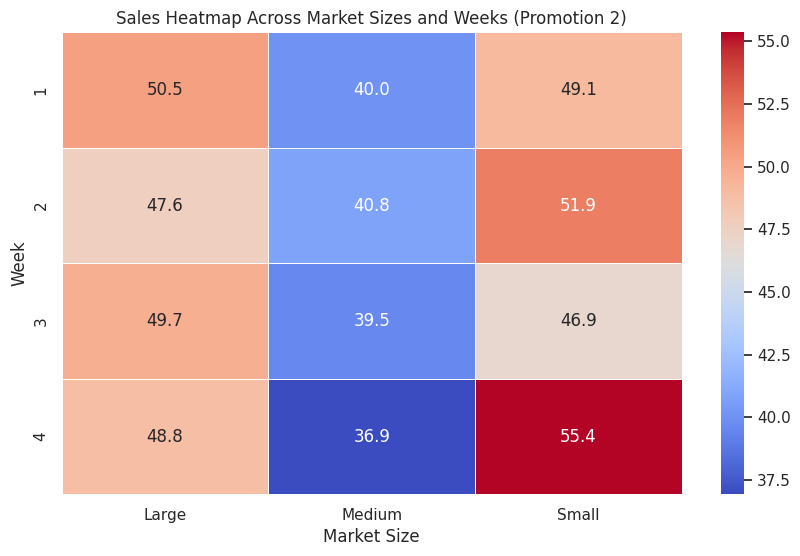

In [40]:
heatmap_data = clean_df[clean_df["Promotion"] == '2'].pivot_table(values="SalesInThousands", index="week", columns="MarketSize", aggfunc=np.mean)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Sales Heatmap Across Market Sizes and Weeks (Promotion 2)")
plt.xlabel("Market Size")
plt.ylabel("Week")
plt.show()

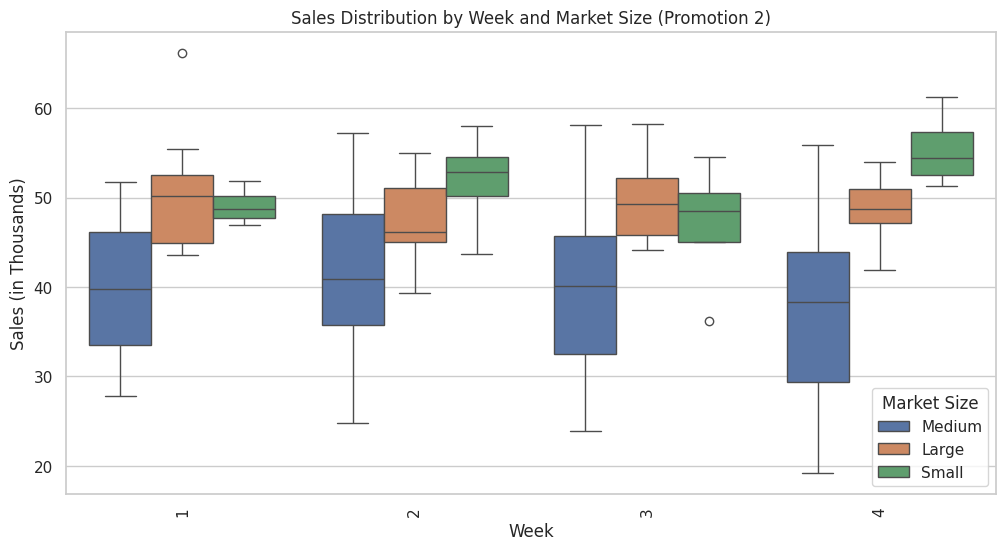

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df[clean_df["Promotion"] == '2'], x="week", y="SalesInThousands", hue="MarketSize")
plt.xticks(rotation=90)
plt.title("Sales Distribution by Week and Market Size (Promotion 2)")
plt.xlabel("Week")
plt.ylabel("Sales (in Thousands)")
plt.legend(title="Market Size")
plt.show()

# Statistical Analysis to Validate Trends

In [43]:
h_stat, p_value = kruskal(
    clean_df[clean_df['MarketSize'] == 'Small']['SalesInThousands'],
    clean_df[clean_df['MarketSize'] == 'Medium']['SalesInThousands'],
    clean_df[clean_df['MarketSize'] == 'Large']['SalesInThousands']
)

print("Kruskal-Wallis Test:")
print(f"H-statistic: {h_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Significant difference exists in sales across market sizes.")
else:
    print("No significant difference in sales across market sizes.")

Kruskal-Wallis Test:
H-statistic: 193.13718586857829, P-value: 1.1502519110353832e-42
Significant difference exists in sales across market sizes.


# Underperorming locations in Promotion 2

In [44]:
location_sales = clean_df.groupby(['LocationID', 'MarketSize'])['SalesInThousands'].mean().reset_index()

# Identify lowest-performing locations
low_sales_locations = location_sales.nsmallest(10, 'SalesInThousands')
print("Underperforming Locations in Promotion 2:")
print(low_sales_locations)

Underperforming Locations in Promotion 2:
    LocationID MarketSize  SalesInThousands
7            8     Medium         27.840000
4            5     Medium         29.002500
68         510     Medium         29.487500
1            2     Medium         29.545000
9           10     Medium         30.665000
64         506     Medium         31.005000
5            6     Medium         31.185000
65         507     Medium         31.743333
66         508     Medium         32.330000
60         502     Medium         32.817500


# Key Insights:
Statistically Significant Differences

The Kruskal-Wallis test (H-statistic: 193.14, P-value: 1.15e-42) confirms that sales performance significantly varies across market sizes for Promotion 2.

This suggests that Promotion 2 does not perform equally across different market sizes, requiring a tailored approach.
Underperforming Locations Identified

The 10 lowest-performing locations are all in Medium-sized markets with sales ranging from 27.84K to 32.82K, which is significantly lower than other market sizes.

Locations 2, 5, 6, 8, 10, 502, 506, 507, 508, and 510 are the most impacted.

# Recommendations:
**Modify Promotion 2 Strategy for Medium Market Size**

Since all underperforming locations are in Medium-sized markets, Promotion 2 should be re-evaluated or redesigned for these areas.
Possible adjustments:

Increase promotional discounts or incentives to drive customer engagement.
Bundle Promotion 2 with other successful promotions in Medium-sized markets.

Reallocate marketing spend to Large and Small markets where Promotion 2 is performing better.

**Location-Specific Strategy for Underperforming Locations**

The 10 lowest-performing locations should receive customized marketing efforts:

Conduct customer feedback surveys to identify why Promotion 2 is not resonating.

Perform A/B testing with alternate promotions to see what works better in these regions.

Increase advertising efforts or local partnerships to boost awareness.

**Further Analysis on External Factors**

Investigate if external market conditions (e.g., competitor activity, regional economic factors, seasonality) are impacting Medium market sales.

Check for inventory/supply chain issues that might be affecting availability in these locations.